### RNN / LSTM 知识背景补充：

* 1. 参考资源：http://karpathy.github.io/2015/05/21/rnn-effectiveness/ ;


### 实现思路
* 第1步：数据文件加载、预处理、可视化；
* 第2步：特征工程（构建数据集）；
* 第3步：模型搭建；
* 第4步：模型编译、训练；
* 第5步：模型保存；¶
* 第6步：模型预测；

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

import tensorflow as tf
from tensorflow.keras import Sequential, layers, utils

import warnings
warnings.filterwarnings("ignore")

### 第1步：数据文件加载、预处理、可视化

In [2]:
# 文件的url
url = "https://cs.stanford.edu/people/karpathy/char-rnn/warpeace_input.txt"

In [3]:
# 根据url下载文件
file = requests.get(url)

In [4]:
# 获取到文本内容
content = file.text

In [5]:
# 总共包含的字符
len(content)

3258246

In [6]:
# 不同的字符
unique_chars = list(set(content))

unique_chars[:10]

['!', 'V', '9', 'g', 'b', 'E', 'j', ' ', '4', '¿']

In [7]:
# 不同的字符的数量
unique_chars_length = len(unique_chars)

unique_chars_length

87

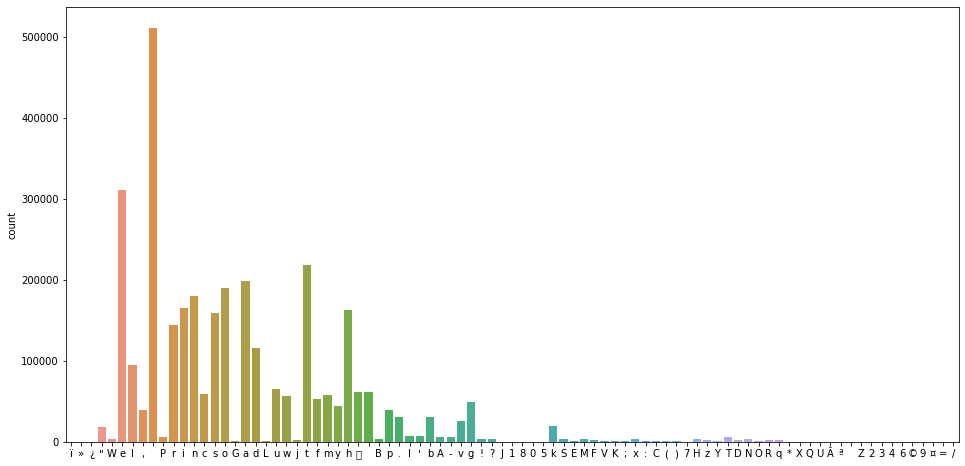

In [8]:
# 统计每个字符出现的频次
plt.figure(figsize=(16,8))
sns.countplot(list(content))
plt.show()

In [9]:
# 创建 2个字典，第一个 char : id , 第二个 id : char

# 对不同的字符进行排序
sorted_unique_chars = sorted(unique_chars)

sorted_unique_chars

['\n',
 '\r',
 ' ',
 '!',
 '"',
 "'",
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '=',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '\xa0',
 '¤',
 '©',
 'ª',
 '»',
 '¿',
 'Ã',
 'ï']

In [10]:
char_to_id = {c : i for i, c in enumerate(sorted_unique_chars)}

id_to_char = {i : c for i, c in enumerate(sorted_unique_chars)}

In [11]:
char_to_id

{'\n': 0,
 '\r': 1,
 ' ': 2,
 '!': 3,
 '"': 4,
 "'": 5,
 '(': 6,
 ')': 7,
 '*': 8,
 ',': 9,
 '-': 10,
 '.': 11,
 '/': 12,
 '0': 13,
 '1': 14,
 '2': 15,
 '3': 16,
 '4': 17,
 '5': 18,
 '6': 19,
 '7': 20,
 '8': 21,
 '9': 22,
 ':': 23,
 ';': 24,
 '=': 25,
 '?': 26,
 'A': 27,
 'B': 28,
 'C': 29,
 'D': 30,
 'E': 31,
 'F': 32,
 'G': 33,
 'H': 34,
 'I': 35,
 'J': 36,
 'K': 37,
 'L': 38,
 'M': 39,
 'N': 40,
 'O': 41,
 'P': 42,
 'Q': 43,
 'R': 44,
 'S': 45,
 'T': 46,
 'U': 47,
 'V': 48,
 'W': 49,
 'X': 50,
 'Y': 51,
 'Z': 52,
 'a': 53,
 'b': 54,
 'c': 55,
 'd': 56,
 'e': 57,
 'f': 58,
 'g': 59,
 'h': 60,
 'i': 61,
 'j': 62,
 'k': 63,
 'l': 64,
 'm': 65,
 'n': 66,
 'o': 67,
 'p': 68,
 'q': 69,
 'r': 70,
 's': 71,
 't': 72,
 'u': 73,
 'v': 74,
 'w': 75,
 'x': 76,
 'y': 77,
 'z': 78,
 '\xa0': 79,
 '¤': 80,
 '©': 81,
 'ª': 82,
 '»': 83,
 '¿': 84,
 'Ã': 85,
 'ï': 86}

In [12]:
id_to_char

{0: '\n',
 1: '\r',
 2: ' ',
 3: '!',
 4: '"',
 5: "'",
 6: '(',
 7: ')',
 8: '*',
 9: ',',
 10: '-',
 11: '.',
 12: '/',
 13: '0',
 14: '1',
 15: '2',
 16: '3',
 17: '4',
 18: '5',
 19: '6',
 20: '7',
 21: '8',
 22: '9',
 23: ':',
 24: ';',
 25: '=',
 26: '?',
 27: 'A',
 28: 'B',
 29: 'C',
 30: 'D',
 31: 'E',
 32: 'F',
 33: 'G',
 34: 'H',
 35: 'I',
 36: 'J',
 37: 'K',
 38: 'L',
 39: 'M',
 40: 'N',
 41: 'O',
 42: 'P',
 43: 'Q',
 44: 'R',
 45: 'S',
 46: 'T',
 47: 'U',
 48: 'V',
 49: 'W',
 50: 'X',
 51: 'Y',
 52: 'Z',
 53: 'a',
 54: 'b',
 55: 'c',
 56: 'd',
 57: 'e',
 58: 'f',
 59: 'g',
 60: 'h',
 61: 'i',
 62: 'j',
 63: 'k',
 64: 'l',
 65: 'm',
 66: 'n',
 67: 'o',
 68: 'p',
 69: 'q',
 70: 'r',
 71: 's',
 72: 't',
 73: 'u',
 74: 'v',
 75: 'w',
 76: 'x',
 77: 'y',
 78: 'z',
 79: '\xa0',
 80: '¤',
 81: '©',
 82: 'ª',
 83: '»',
 84: '¿',
 85: 'Ã',
 86: 'ï'}

In [13]:
# 将文本中所有字符全部替换为id

dataset = [char_to_id[i] for i in content]

len(dataset)

3258246

In [14]:
dataset[:10]

[86, 83, 84, 4, 49, 57, 64, 64, 9, 2]

In [15]:
# 构造特征数据集和标签集

dataset_size = len(dataset)

print("总的字符集数量：", dataset_size)

总的字符集数量： 3258246


In [16]:
# 序列长度

SEQ_LEN = 10

In [17]:
# 初始化特征数据集和标签集
X = []
y = []

for i in np.arange(0, dataset_size - SEQ_LEN, step=1):
    seq = dataset[i : i+SEQ_LEN] # 序列
    lab = dataset[i+SEQ_LEN] # 标签
    # 添加到X和y中
    X.append(seq)
    y.append(lab)

In [18]:
# 统计X中的元素数量

X = np.array(X)

X.shape

(3258236, 10)

In [19]:
# 显示前5个序列

X[:5, :]

array([[86, 83, 84,  4, 49, 57, 64, 64,  9,  2],
       [83, 84,  4, 49, 57, 64, 64,  9,  2, 42],
       [84,  4, 49, 57, 64, 64,  9,  2, 42, 70],
       [ 4, 49, 57, 64, 64,  9,  2, 42, 70, 61],
       [49, 57, 64, 64,  9,  2, 42, 70, 61, 66]])

In [20]:
# 统计y中的元素数量

y = np.array(y)

y.shape

(3258236,)

In [21]:
# 显示前5个序列

y[:5]

array([42, 70, 61, 66, 55])

In [22]:
# 数据归一化

X = X / unique_chars_length

In [23]:
# 数据reshape，格式：(batch_size, seq_len, features)

X = X.reshape(X.shape[0], SEQ_LEN, 1)

X.shape

(3258236, 10, 1)

In [24]:
# 标签集y进行One_hot转换

y = tf.keras.utils.to_categorical(y)

y.shape

(3258236, 86)

### 第3步：模型搭建

In [25]:
model = Sequential([
    layers.LSTM(units=800, input_shape=(SEQ_LEN, 1), return_sequences=True),
    layers.Dropout(0.3),
    layers.LSTM(units=800, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(units=800),
    layers.Dropout(0.2),
    layers.Dense(y.shape[1], activation='softmax')
])

In [26]:
# 定义 callbacks

# 1 ModelCheckpoint

file_path = "novel_model_weights.htf5"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='loss', verbose=1,
                                                         mode='min', save_best_only=True, save_weights_only=True)

### 第4步：模型编译、训练

In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy')

In [28]:
history = model.fit(X, y, epochs=30, batch_size=128, callbacks=[checkpoint_callback])

Epoch 1/30
25455/25455 [==============================] - 439s 17ms/step - loss: 2.0562

Epoch 00001: loss improved from inf to 2.05620, saving model to novel_model_weights.htf5
Epoch 2/30
25455/25455 [==============================] - 490s 19ms/step - loss: 1.5865

Epoch 00002: loss improved from 2.05620 to 1.58647, saving model to novel_model_weights.htf5
Epoch 3/30
25455/25455 [==============================] - 481s 19ms/step - loss: 1.4634

Epoch 00003: loss improved from 1.58647 to 1.46337, saving model to novel_model_weights.htf5
Epoch 4/30
25455/25455 [==============================] - 433s 17ms/step - loss: 1.3964

Epoch 00004: loss improved from 1.46337 to 1.39644, saving model to novel_model_weights.htf5
Epoch 5/30
25455/25455 [==============================] - 478s 19ms/step - loss: 1.3512

Epoch 00005: loss improved from 1.39644 to 1.35117, saving model to novel_model_weights.htf5
Epoch 6/30
25455/25455 [==============================] - 453s 18ms/step - loss: 1.3186

Epoch

### 第5步：模型保存

In [29]:
model.save("novel_best_model.h5") # 保存模型

In [30]:
model = tf.keras.models.load_model("novel_best_model.h5") # 加载模型

### 第6步：模型预测

In [31]:
def prediction(model, sample):
    s = [] # 保存每个字符对应的id
    for c in sample:
        c_to_id = char_to_id[c] # 字符映射到对应的索引 id
        s.append(c_to_id) # 保存id
    #print("原始的字符sample：\n", sample)
    #print("转换后的sample：\n", s)
    
    t = s # 保存一份s
    
    for i in range(100):
        X = np.reshape(t, (1, SEQ_LEN, 1)) # shape转换，为模型输入shape
        X = X / unique_chars_length # 归一化

        # 模型预测
        pred = model.predict(X, verbose=1)

        # 预测结果中最大概率值索引
        index = np.argmax(pred)

        # 根据索引找到对应的字符
        match_char = id_to_char[index] # 根据索引获取对应的字符

        print("预测字符：", match_char)
        
        s.append(index) # 将新的预测结果保存

        t = s[i : i+SEQ_LEN] # 截取下一个输入字符序列
        print("{}轮，t : {}".format(i, t)) # 打印信息
        
    new_chars = ''.join([id_to_char[i] for i in s]) # 将列表中的每个字符进行拼接
    
    return new_chars

##### 测试案例

In [32]:
test1 = "Tommy said"

resutl1 = prediction(model, test1)

1/1 [==============================] - 1s 549ms/step
预测字符：  
0轮，t : [46, 67, 65, 65, 77, 2, 71, 53, 61, 56]
1/1 [==============================] - 0s 9ms/step
预测字符：  
1轮，t : [67, 65, 65, 77, 2, 71, 53, 61, 56, 2]
1/1 [==============================] - 0s 8ms/step
预测字符： t
2轮，t : [65, 65, 77, 2, 71, 53, 61, 56, 2, 2]
1/1 [==============================] - 0s 9ms/step
预测字符： t
3轮，t : [65, 77, 2, 71, 53, 61, 56, 2, 2, 72]
1/1 [==============================] - 0s 9ms/step
预测字符： h
4轮，t : [77, 2, 71, 53, 61, 56, 2, 2, 72, 72]
1/1 [==============================] - 0s 8ms/step
预测字符： r
5轮，t : [2, 71, 53, 61, 56, 2, 2, 72, 72, 60]
1/1 [==============================] - 0s 8ms/step
预测字符： g
6轮，t : [71, 53, 61, 56, 2, 2, 72, 72, 60, 70]
1/1 [==============================] - 0s 9ms/step
预测字符： l
7轮，t : [53, 61, 56, 2, 2, 72, 72, 60, 70, 59]
1/1 [==============================] - 0s 8ms/step
预测字符： i
8轮，t : [61, 56, 2, 2, 72, 72, 60, 70, 59, 64]
1/1 [==============================] - 0s 8ms/step
预测字符：

In [33]:
resutl1

'Tommy said  tthrglienss  wwh ntorseed nhogelamrsr oafsy  aIn dtotlse  aanoue tahliensc rweisl eaxrs eovti ntor'

In [34]:
test2 = "Sally very"

result2 = prediction(model, test2)

1/1 [==============================] - 0s 9ms/step
预测字符：  
0轮，t : [45, 53, 64, 64, 77, 2, 74, 57, 70, 77]
1/1 [==============================] - 0s 9ms/step
预测字符：  
1轮，t : [53, 64, 64, 77, 2, 74, 57, 70, 77, 2]
1/1 [==============================] - 0s 9ms/step
预测字符： s
2轮，t : [64, 64, 77, 2, 74, 57, 70, 77, 2, 2]
1/1 [==============================] - 0s 8ms/step
预测字符： a
3轮，t : [64, 77, 2, 74, 57, 70, 77, 2, 2, 71]
1/1 [==============================] - 0s 9ms/step
预测字符： i
4轮，t : [77, 2, 74, 57, 70, 77, 2, 2, 71, 53]
1/1 [==============================] - 0s 9ms/step
预测字符： d
5轮，t : [2, 74, 57, 70, 77, 2, 2, 71, 53, 61]
1/1 [==============================] - 0s 9ms/step
预测字符： n
6轮，t : [74, 57, 70, 77, 2, 2, 71, 53, 61, 56]
1/1 [==============================] - 0s 9ms/step
预测字符：  
7轮，t : [57, 70, 77, 2, 2, 71, 53, 61, 56, 66]
1/1 [==============================] - 0s 9ms/step
预测字符： c
8轮，t : [70, 77, 2, 2, 71, 53, 61, 56, 66, 2]
1/1 [==============================] - 0s 9ms/step
预测字符： a


In [35]:
result2

'Sally very  saidn caord iandnse rcepiasl etxearte dto loavdh lhef loiot eaycoreyi naet  atn mtesf roeoe tahkle'